# Exploring arranging several pages in one layout  in Magics

This notebook will help you discover how to plot several maps on one page using Magics.

The position of a page is set with the 4 following parameters

- **page_x_position / page_y_position** : to position in cm the bottom left corner of the page in its parent
- **page_x_length / page_y_length** : the dimension in cm.

The drawing area ( where the plotting is rendered) is called subpage and can position into the page using the 4 following parameters

- **subpage_x_position / subpage_y_position** : to position in cm the bottom left corner of the drawing area (subpage)  in its parent page.
- **subpage_x_length / subpage_y_length** : the dimension in cm.

### Import Magics and define projection, dark background, light background, foreground and load data

We will compose one image with 4 maps: 
- top left : temperature at 850 hPa and geopotential height at 500 hPa
- top right : precipitation type
- bottom left : simulated satellite image IR channel
- bottom right : total precipitation

For start let's import Magics and define background, foreground and load data for our maps.  

In [1]:
import Magics.macro as magics

projection = magics.mmap(
    subpage_clipping         = "on",
    subpage_map_library_area = "on",
    subpage_map_area_name    = "central_europe"
)

light_background = magics.mcoast(
    map_coastline_sea_shade_colour  = 'white',
    map_coastline_land_shade_colour = 'cream',
    map_grid                        = 'off',
    map_coastline_land_shade        = 'on',
    map_coastline_sea_shade         = 'on',
    map_label                       = 'off',
    map_coastline_colour            = 'tan')

dark_background = magics.mcoast(
    map_coastline_colour            = "grey",
    map_coastline_resolution        = "medium",
    map_coastline_thickness         = 2,
    map_coastline_land_shade        = "on",
    map_coastline_land_shade_colour = "RGB(0.25,0.25,0.25)",
    map_coastline_sea_shade         = "on",
    map_coastline_sea_shade_colour  = "black",
    map_grid_line_style             = "dash",
    map_grid_colour                 = "grey"
)

foreground = magics.mcoast()

# Different meteorological parameter we will plot in this notebook
temperature   = magics.mgrib(grib_input_file_name = "data/t850.grib")
geopotential  = magics.mgrib(grib_input_file_name = "data/z500.grib")
precipitation = magics.mgrib(grib_input_file_name = "data/total_precipitation.grib")
sat_ir        = magics.mgrib(grib_input_file_name = "data/ssd.grib",
                             grib_automatic_scaling = "off")
ptype         = magics.mgrib(grib_input_file_name = "data/ptype.grib")

### Shading and symbol definitions

Now we define contours for all fields. 

Temperature - gradients method for shading  (Mores shading examples you can find [in this notebook](Contours_shading.ipynb "Shading contours"))  
Geopotential height - automatic style from ecCharts  (More examples of automatic styles you can find [in this notebook](Contours_automtatic.ipynb "Automatic contours"))

Precipitation type - advanced symbol plotting (More examples of symbol plotting you can find in [simple symbol](Symbol_simple.ipynb "Symple symbol plotting") and [advanced symbol](Symbol_advanced.ipynb "Advanced symbol plotting") notebooks)

Brightness temperature - cell shading  

Total precipitation - poligon shading with user defined list of level and colours

In [2]:
# Temperature shading
t_cont = magics.mcont(
    legend                            = "on",
    contour                           = "off",
    contour_level_selection_type      = "level_list",
    contour_level_list                = [-30.,-20.,0.,20.,30.],
    contour_gradients_step_list       = [5, 10 ,10 ,5],
    contour_label                     = "off",
    contour_shade                     = "on",
    contour_shade_colour_method       = "gradients",
    contour_gradients_technique       = "rgb",
    contour_shade_method              = "area_fill",
    contour_gradients_colour_list     = ["RGB(0.01961,0.251,0.4157)","greenish_blue","white",
                                         "orangish_red","RGB(0.3756,0.06648,0.05582)"],
    contour_gradients_waypoint_method = "ignore")

# Geopotential shading - default ECMWF style
ecmwf_cont = magics.mcont(
    contour_automatic_setting = "ecmwf",
    legend                    = "off")

# Symbol plotting for precipitation type
symbol_plotting = magics.msymb(
    symbol_advanced_table_colour_method    = "list",
    symbol_advanced_table_height_method    = "calculate",
    symbol_advanced_table_height_min_value = 1.,
    symbol_advanced_table_height_max_value = 1.,
    symbol_type                            = "marker",
    symbol_table_mode                      = "advanced",
    symbol_marker_mode                     = "name",
    symbol_advanced_table_selection_type   = "list",
    symbol_advanced_table_colour_list      = ["green","red","blue","navy","turquoise","orange"],
    symbol_advanced_table_level_list       = [1.00,3.00,5.00,6.00,7.00,8.00,9.00],
    symbol_advanced_table_marker_name_list = ["ww_60","ww_67","ww_70","ww_68","ww_69","ww_79"])

# Cell shading for Brightness temperature
ir_clouds = magics.mcont(
    contour_shade_colour_direction   = "anti_clockwise",
    contour_shade_min_level_colour   = "white",
    contour_shade_max_level_colour   = "black",
    contour_shade_colour_method      = "calculate",
    legend                           = "on",
    contour                          = "off",
    contour_level_selection_type     = "level_list",
    contour_level_list               = [170.,199.,201.,203.,205.,207,208,209,210,
                                        211,212,213,214,215,216,217,218,219,220,
                                        221,222,223,224,225,226,227,228,229,230,
                                        231,232,233,234,235,236,237,238,239,240,
                                        241,242,243,244,245,246,247,249,251,253,
                                        255,257,259,261,263,265,267,269,271,273,
                                        275,277,279,281,283,285,287,289,291,293,
                                        295,297,299,301,303,305,307,310,315,320,350],
    contour_shade                    = "on",
    contour_shade_technique          = "cell_shading",
    contour_shade_cell_resolution    = 80
    )

# Precipitation shading
tp_cont = magics.mcont(
    contour_level_selection_type   = "level_list",
    contour_level_list             = [0.5, 1, 2, 5, 10, 20, 50, 100, 200, 500],
    contour_shade                  = "on",
    contour_shade_method           = "area_fill",
    contour_shade_colour_method    = "list",
    contour_shade_colour_list      = ['#ffffd9','#edf8b1','#c7e9b4',
                                      '#7fcdbb','#41b6c4','#1d91c0',
                                      '#225ea8','#253494','#081d58'],
    contour                        = "off",
    legend                         = "on"
)

### Legends

Lets define legends for our plots.  
All but one will be on the right side and we will use automatic box mode and let Magics put it in the right position. Only the symbol legend will be on top because it takes less space there. 

In [3]:
# Defining legend for total precipitation
tp_legend = magics.mlegend (    
    legend_display_type       = "continuous",
    legend_automatic_position = "right",
    legend_title              = "on",
    legend_title_text         = "Total precipitation",
    legend_text_font_size     = "0.45",
    legend_text_colour        = "#2b619e",
    legend_label_frequency    = 1) 

# Defining legend for temperature
temp_legend = magics.mlegend (    
    legend_display_type       = "continuous",
    legend_automatic_position = "right",
    legend_title              = "on",
    legend_title_text         = "Temperature at 850 hPa",
    legend_text_font_size     = "0.45",
    legend_text_colour        = "#2b619e",
    legend_text_composition    = "user_text_only",
    legend_values_list         = [-30.,-20.,-10.,0.,10.,20.,30.])

# Defninig legend for Simulated satelite image
bt_legend = magics.mlegend(
    legend_display_type       = "continuous",
    legend_automatic_position = "right",
    legend_title              = "on",
    legend_title_text         = "Brightness temperature",
    legend_text_font_size     = "0.45",
    legend_text_colour        = "#2b619e",
    legend_label_frequency    = 4,
    legend_user_minimum       = "on",
    legend_user_minimum_text  = "< 200",
    legend_user_maximum       = "on",
    legend_user_maximum_text  = "> 320",
    legend_entry_border       = "off")

# Defninig legend for Precipitation type
symb_legend = magics.mlegend(
    legend_user_lines =  ["Rain","Freezing rain", "Snow", "Wet snow", "Sleet", "Ice pellets"],
    legend_box_mode = "positional",
    legend_text_composition = "user_text_only",
    legend_text_colour = "#2b619e",   
    legend_text_font_size = 0.4,
    legend_box_y_position = 11.1,
    legend_box_x_position = -0.7,
    legend_box_x_length = 15.00,
    legend_box_y_length = 2.5)

### Text definitions

First four texts are titles at automatic positions, and the last 2 are there as lables for explanation of page and subpage.  
As you can see, you can add HTML symbols in title too.

In [4]:
top_left_text     = magics.mtext(text_lines = ["Temperature at 850 hPa and Geopotential height at 500 hPa"],
                                 text_font_size = 0.55,
                                 text_colour = "charcoal")
bottom_right_text    = magics.mtext(text_lines = [" &#9730; Total precipitation &#9748; "],
                                 text_colour = "charcoal",
                                 text_font_size = 0.6)
bottom_left_text  = magics.mtext(text_lines = ["Brightness temperature"],
                                 text_colour = "charcoal",
                                 text_font_size = 0.6)
top_right_text = magics.mtext(text_lines = ["  &#10052;  Precipitation type   &#10053;"],
                                 text_colour = "charcoal",
                                 text_font_size = 0.6)

additional_text_page = magics.mtext(
    text_lines = ["&larr;              PAGE              &rarr;"],
    text_colour         = "red",
    text_font_size      = 1.4,
    text_mode           = "positional",
    text_box_x_position = 3.75,
    text_box_y_position = 13.50)

additional_text_subpage = magics.mtext(
    text_lines = ["&larr;         SUBPAGE         &rarr;"],
    text_colour = "red",
    text_font_size = 1.2,
    text_mode           = "positional",
    text_box_x_position = 3.25,
    text_box_y_position = 4.50)

### Finally, A bit of layout

In order to put 4 maps on our final product we have to define size of the superpage (**super_page_x_length / super_page_y_length**) and positions and lenghts of 4 pages. 

Top left page will have a page frame in order to help you understand the superpage/page/subpage concept.

In [5]:
top_left = magics.page(
    layout          = 'positional', 
    page_x_length   = 15.,
    page_y_length   = 15.,
    page_frame      = 'on',
    page_id_line    = 'off',
    page_x_position = 0.,
    page_y_position = 14.,
    super_page_x_length = 30.00,
    super_page_y_length = 30.00)

top_right = magics.page(
    page_frame         = 'off',
    layout             = 'positional',
    page_x_length      = 15.,
    page_y_length      = 15.,
    page_id_line       = 'off',
    page_x_position    = 14.7,
    page_y_position    = 14.
        )

bottom_right = magics.page(  
    page_frame         = 'off',
    layout             = 'positional',
    page_x_length      = 15.,
    page_y_length      = 15.,
    page_id_line       = 'off',
    page_x_position    = 14.7,
    page_y_position    = 0.5
        )

bottom_left = magics.page( 
    page_frame         = 'off',
    layout             = 'positional',
    page_x_length      = 15.,
    page_y_length      = 15.,
    page_id_line       = 'off',
    page_x_position    = 0.,
    page_y_position    = 0.5
        )

### The plot command

All that is left is to put everything in the plot command.  
Each page has page definition, projection, data, shading for data, coastline, legend and text.

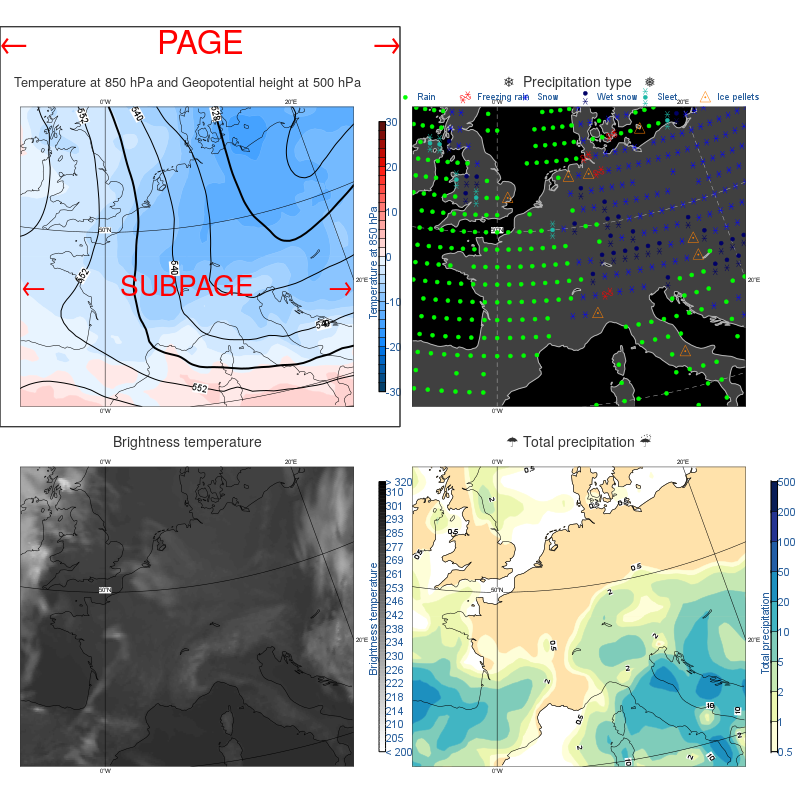

In [6]:
magics.plot(top_left, projection, temperature, t_cont, geopotential, ecmwf_cont, foreground, temp_legend,top_left_text, 
            additional_text_subpage, additional_text_page,
            bottom_right, projection, light_background, precipitation, tp_cont, tp_legend, foreground, bottom_right_text,
            bottom_left, projection, sat_ir, ir_clouds, foreground, bt_legend, bottom_left_text,
            top_right, projection, dark_background, ptype, symbol_plotting, symb_legend, top_right_text)